# B-Spline Examples

In [1]:
# Initialize
import numpy as np
import matplotlib.pyplot as plt
import time
from src.containers import Knotvector
from src.nurbs.bsplines import CardinalBSpline, NonUniformBSpline

## Example 1: Cardinal B-Splines

Cardinal B-spline of degree 1:
  Support: (0.0, 1.0)
  Number of branches: 1
Cardinal B-spline of degree 2:
  Support: (0.0, 2.0)
  Number of branches: 2
Cardinal B-spline of degree 3:
  Support: (0.0, 3.0)
  Number of branches: 3


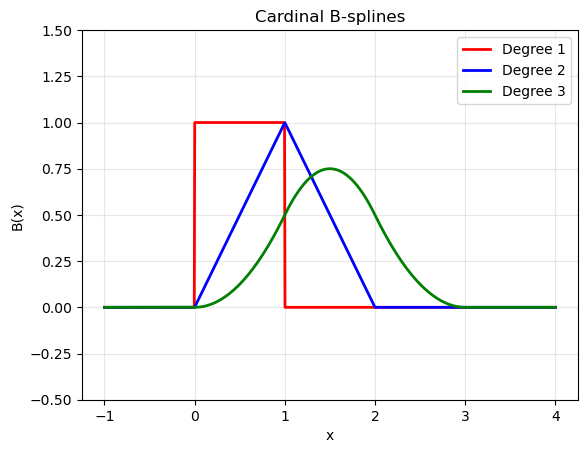

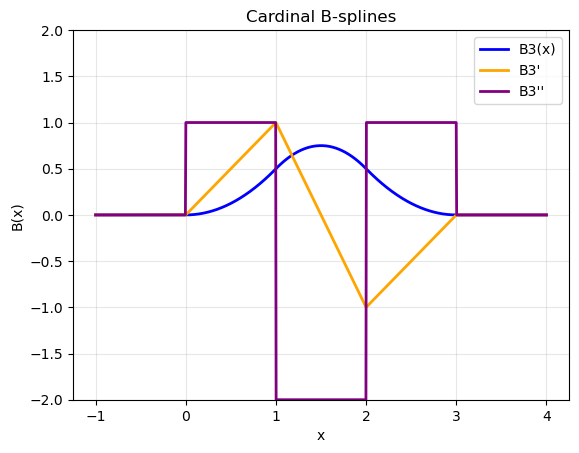

Analytic Expressions for B3(x)
[CardinalBSpline] with 3 branches:
+-> [Branch] on [0.0,1.0) = 
	Numerator:[Polynomial] = [0.5 0.  0. ]
	Denominator:[Polynomial] = [1.]
+-> [Branch] on [1.0,2.0) = 
	Numerator:[Polynomial] = [-1.   3.  -1.5]
	Denominator:[Polynomial] = [1.]
+-> [Branch] on [2.0,3.0] = 
	Numerator:[Polynomial] = [ 0.5 -3.   4.5]
	Denominator:[Polynomial] = [1.]


In [4]:
# Create B-splines of different degrees
degrees = [1, 2, 3]
colors = ['red', 'blue', 'green']
labels = ['Degree 1', 'Degree 2', 'Degree 3']

x = np.linspace(-1, 4, 1000)

for i, degree in enumerate(degrees):
    # Create Cardinal B-Spline
    B = CardinalBSpline(m=degree)
    y = B(x)
    
    plt.plot(x, y, color=colors[i], linewidth=2, label=labels[i])
    
    print(f"Cardinal B-spline of degree {degree}:")
    print(f"  Support: {B.global_support}")
    print(f"  Number of branches: {B.nr_branches}")

plt.xlabel('x')
plt.ylabel('B(x)')
plt.title('Cardinal B-splines')
plt.legend()
plt.grid(True, alpha=0.3)
plt.ylim(-0.5, 1.5)

# Derivatives
plt.figure()
B3 = CardinalBSpline(m=3)
B3_prime = B3.diff(1)  # First derivative
B3_double_prime = B3.diff(2)  # Second derivative

plt.plot(x, B3(x), 'blue', linewidth=2, linestyle='-', label="B3(x)")
plt.plot(x, B3_prime(x), 'orange', linewidth=2, linestyle='-', label="B3'")
plt.plot(x, B3_double_prime(x), 'purple', linewidth=2, linestyle='-', label="B3''")

plt.xlabel('x')
plt.ylabel('B(x)')
plt.title('Cardinal B-splines')
plt.legend()
plt.grid(True, alpha=0.3)
plt.ylim(-2, 2)
plt.show()

print("Analytic Expressions for B3(x)")
print(repr(B3))


## Example 2: Non-Uniform B-Splines

Non-uniform B-spline N_1:
  Support: [0.0, 5.0)
  Knots: 0.0, 0.0, 0.0, 5.0
Non-uniform B-spline N_2:
  Support: [0.0, 5.0)
  Knots: 0.0, 0.0, 5.0, 5.0
Non-uniform B-spline N_3:
  Support: [0.0, 5.0)
  Knots: 0.0, 5.0, 5.0, 5.0


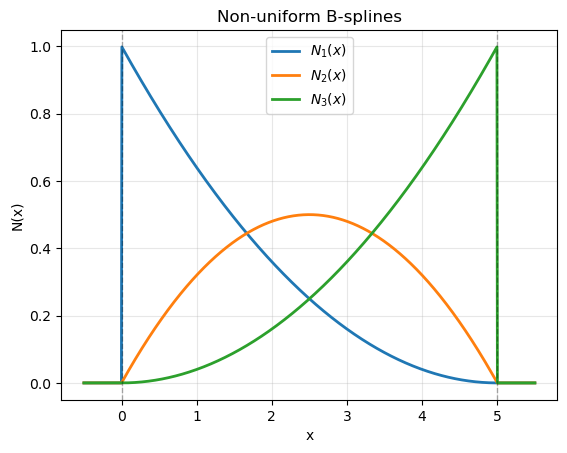

In [6]:
# Create non-uniform knot vector
t = Knotvector(degree=3, domain=(0, 5), first_index=0)
knots = t.items
x = np.linspace(-0.5, 5.5, 1000)

# Create multiple non-uniform B-splines
for k in range(1, len(knots) - (t.degree+1)):
    try:
        N = NonUniformBSpline(t, m=t.degree, k=k)
        y = N(x)
        
        # Find support for labeling
        support_start = t[k]
        support_end = t[k+t.degree+1]  
        
        plt.plot(x, y, linewidth=2, label=f'$N_{k}(x)$')
        
        print(f"Non-uniform B-spline N_{k}:")
        print(f"  Support: [{support_start:.1f}, {support_end:.1f})")
        print(f"  Knots: {t[k]}, {t[k+1]}, {t[k+2]}, {t[k+3]}")
        
    except Exception as e:
        print(f"  Error for k={k}: {e}")

# Show knots
for knot in np.unique(t.items):
    plt.axvline(x=knot, color='black', linestyle='--', alpha=0.3, linewidth=1)

plt.xlabel('x')
plt.ylabel('N(x)')
plt.title('Non-uniform B-splines')
plt.legend()
plt.grid(True, alpha=0.3)
